# The Steps involved in solving a problem in Deep Learning



1. Environment Setup: Import Necessary packages 
2. Loading of Input: Data importing and Exploration, Preprocessing
3. Split the data into two parts: "Training images and Testing images"
4. Building a Deep learningModel:Using appropriate algorithm,Train the model with training image, and saving the model with weights.
5. Model Evaluation: Getting Accuracy for the predicted model 
6. Finally observing the model with testing image to get final prediction.


### (1) Environment Setup

- **listdir**- To get the list of all files and directories in the specified 
- **time**- This function returns the number of seconds passed since epoch
- **cv2**- Loads an image from the specified file
- **tensorflow**- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.
- **shuffle**- The shuffle() method takes a sequence (list, string, or tuple and data) and reorganize the order of the items.
- **numpy**- ) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
- **matplotlib**- is a library creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
- **imutils**-  A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV 
- **sklearn.metrics**-  implements several loss, score, and utility functions to measure classification performance.
- **sklearn.model_selection**-  that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.
- **Keras**- is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow,Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible
- **tensorflow.keras.callbacks**- A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference, including reading/changing the Keras model.

In [ ]:
from os import listdir
import keras
import cv2
import imutils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
brain_data = '/content/gdrive/My Drive/Brain Tumor Data sets.zip'

with ZipFile(brain_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## (2) Loading of Input-Data importing, Exploration, Preprocessing

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)
#PIL- Python Image Library, it supports opening, manipulating and saving many different image file formats etc.

Pillow Version: 7.0.0


In [ ]:
from PIL import Image
image = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
print(image.format)
print(image.mode)# that each pixel takes 3 bytes of storage, one for red, one for green and one for blue.
print(image.size)

JPEG
RGB
(524, 581)


In [ ]:
from PIL import Image
image = Image.open('/content/Brain Tumor Data sets/Training/meningioma_tumor/m (105).jpg')
print(image.format)
print(image.mode)
print(image.size)


JPEG
RGB
(512, 512)


uint8
(826, 892, 3)


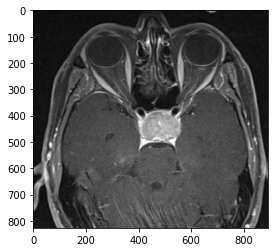

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('/content/Brain Tumor Data sets/Testing/pituitary_tumor/image(89).jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

## Saving image into another format

In [ ]:
from PIL import Image
image = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
image.save('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).png',format='PNG')
up_format = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).png')
print(up_format.format)

PNG


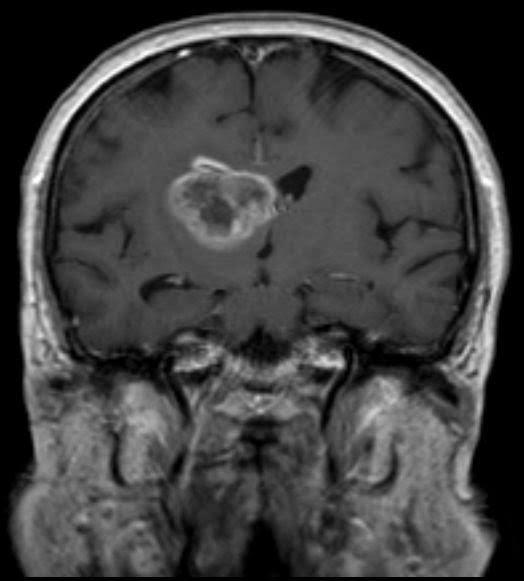

In [ ]:
#gray scale version of loaded image
from PIL import Image
image = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
gray_image = image.convert(mode= 'L')#L means "Luminance" i.e on a scale of black to white, i.e. greyscale
gray_image.save('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
_image = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
_image

(90, 100)


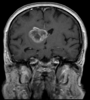

In [ ]:
#resize of image, new dimn round to the nearest integer, instead of always rounding down, we preservs the original aspect ratio.
rs_size = Image.open('/content/Brain Tumor Data sets/Testing/glioma_tumor/image(12).jpg')
MAX_SIZE = (100, 100)
image.thumbnail(MAX_SIZE)
print(image.size)
image

In [ ]:
def brain_crop(image, plot=False): # if plot=true then we cant call content function
   
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

#cropping of sample image

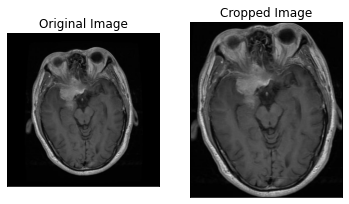

In [ ]:
cp_img = cv2.imread('/content/Brain Tumor Data sets/Training/meningioma_tumor/m (105).jpg')
cp_new_img = brain_crop(cp_img,True)

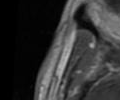

In [ ]:
#cropping a portion of image as segment
image = Image.open('/content/Brain Tumor Data sets/Training/meningioma_tumor/m (105).jpg')

cropped = image.crop((50,100,170,200))
cropped

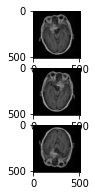

In [ ]:
#Flipping of tumor data
flip_image = Image.open('/content/Brain Tumor Data sets/Training/meningioma_tumor/m (105).jpg')
#horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

pyplot.subplot(411)
pyplot.imshow(image)

pyplot.subplot(412)
pyplot.imshow(hoz_flip)

pyplot.subplot(413)
pyplot.imshow(ver_flip)
